In [185]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)


from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge


In [186]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [187]:
df.head()


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom

In [188]:
missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [189]:
df[df.CustomerID.isnull()].head()


InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

             InvoiceDate  UnitPrice CustomerID         Country  
622  2010-12-01 11:52:00       0.00        NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51        NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51        NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85        NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66        NaN  United Kingdom

In [190]:
# Removing None Customer IDs
df = df.loc[(df.CustomerID.isnull()==False)].copy()

In [191]:
df.isnull().sum().sum()


0

In [192]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Q1: Which Country makes the most transactions?


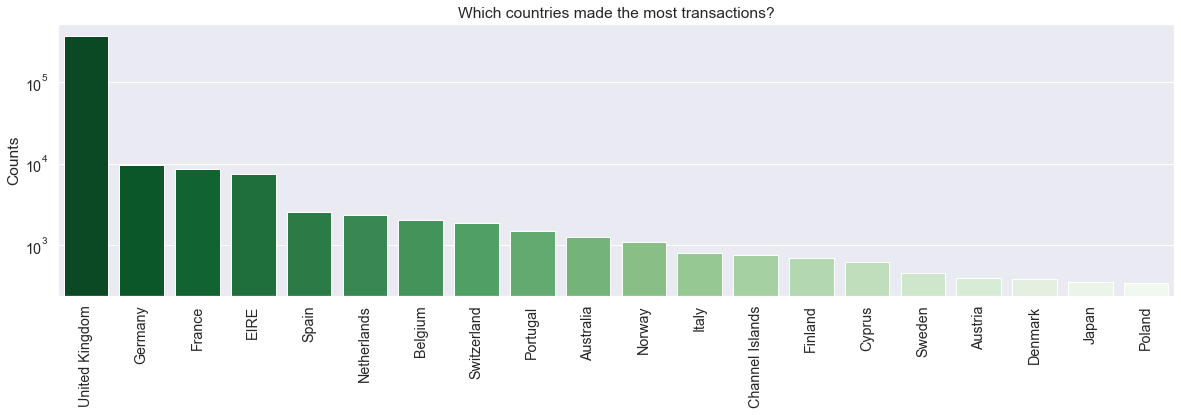

In [193]:
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

# Q2: Show the Top 10 Customers how made the largest Revenue

In [194]:
df["Revenue"] = df.Quantity * df.UnitPrice


In [195]:
tc=df.loc[:, ["CustomerID", "Revenue"]]
tc

CustomerID  Revenue
0           17850    15.30
1           17850    20.34
2           17850    22.00
3           17850    20.34
4           17850    20.34
...           ...      ...
541904      12680    10.20
541905      12680    12.60
541906      12680    16.60
541907      12680    16.60
541908      12680    14.85

[406829 rows x 2 columns]

In [196]:
top=tc.sort_values('CustomerID',ascending=False)
top=tc.sort_values('Revenue',ascending=False)
top.head(10)

CustomerID    Revenue
540421      16446  168469.60
61619       12346   77183.60
222680      15098   38970.00
173382      16029    8142.75
348325      17450    7144.72
160546      15749    6539.40
52711       15749    6539.40
421601      14646    4992.00
52709       15749    4921.50
160542      15749    4632.00

# Q3: Show Top 5 frequent Customers

In [197]:
count = tc['CustomerID'].value_counts()
count.head(5)

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
Name: CustomerID, dtype: int64

# Q4: Create a histogram that reveals the count of words of ùë´ùíÜùíîùíÑùíìùíäùíëùíïùíäùíêùíè

In [198]:
df["DescriptionLength"] = df.Description.apply(lambda l: len(l))

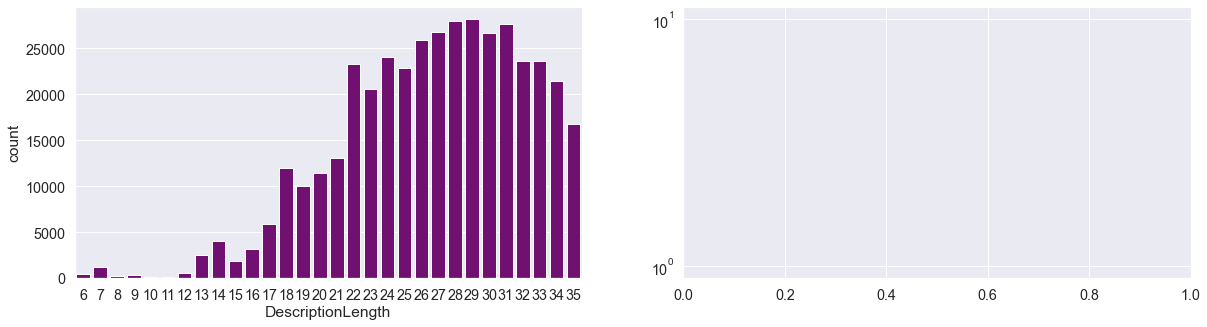

In [199]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(df.DescriptionLength, ax=ax[0], color="Purple")
ax[1].set_yscale("log")

# Q5: Extract {ùëåùëíùëéùëü, ùëÄùëúùëõùë°‚Ñé, ùëäùëíùëíùëò, ùëäùëíùëíùëòùê∑ùëéùë¶, ùê∑ùëéùë¶, ùê∑ùëéùë¶ùëÇùëìùëåùëíùëéùëü,ùê∑ùëéùë°ùëí} features from ùêºùëõùë£ùëúùëñùëêùëíùê∑ùëéùë°ùëí feature


In [200]:
df["Year"] = df.InvoiceDate.dt.year
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Month"] = df.InvoiceDate.dt.month
df["Week"] = df.InvoiceDate.dt.week
df["Weekday"] = df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] = df.InvoiceDate.dt.dayofyear
df["Date"] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [201]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Revenue  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom    15.30   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom    20.34   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom    22.00   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom    20.34   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom    20.34   

   DescriptionLength  Year  Quarter  Month  Week  Weekday  Day  Dayofyear  \
0                 34  2010        4     12    48        2    1        335   
1                 19  2010        4     12    48        2    1        335   
2                 30  2010        4     12    48        2    1        335   
3                 35  2010        4     12    48        2    1        335   
4                 30  2010        4     12    48        2    1        335   

        Date  
0 2010-12-01  
1 2010-12-01  
2 2010-12-01  
3 2010-12-01  
4 2010-12-01

# Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [202]:
grouped_features = ["Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day","StockCode"]

In [203]:
daily_data = pd.DataFrame(df.groupby(grouped_features).Quantity.sum(),
                          columns=["Quantity"])
daily_data["Revenue"] = df.groupby(grouped_features).Revenue.sum()
daily_data = daily_data.reset_index()
daily_data.head(5)

Date  Year  Quarter  Month  Week  Weekday  Dayofyear  Day StockCode  \
0 2010-12-01  2010        4     12    48        2        335    1     10002   
1 2010-12-01  2010        4     12    48        2        335    1     10125   
2 2010-12-01  2010        4     12    48        2        335    1     10133   
3 2010-12-01  2010        4     12    48        2        335    1    15044B   
4 2010-12-01  2010        4     12    48        2        335    1   15056BL   

   Quantity  Revenue  
0        60    51.00  
1         2     1.70  
2         5     4.25  
3         1     2.95  
4        20   113.00